# Assignment 1 - Exercise Setup
This notebook contains the necessary code setup for the accompanying exercises. 

# 1. Coordinate Descent

In [5]:
def argmin_x1(x):
    """Your code here"""

def argmin_x2(x):
    """Your code here"""

def argmin_x3(x):
    """Your code here"""

def f(x):
    """Your code here"""

def coordinate_descent(f, argmin, x0, max_iter=100, verbose=False):
    """Your code here"""
    for i in range(max_iter):
        # And here
        pass

# 2. Gradient Descent

Descent calculation using constant step size: 

Path taken by gradient descent using the constant method: [(4, -5), (3.956, -4.56), (3.919077652736, -4.236427168), (3.8874207178866147, -3.9847510915255904), (3.859910094289488, -3.781533726993982), (3.8357780947468303, -3.6129622061759727), (3.8144616853320827, -3.4702443761426887), (3.7955288711698167, -3.347459504382845), (3.7786374762397523, -3.2404443826995446), (3.763510076198185, -3.1461693975667253), (3.749917747839666, -3.062367312571772), (3.7376689880255984, -2.987301458132386), (3.726601844937992, -2.9196151045057963), (3.716578143439806, -2.8582302717890418), (3.707479131223143, -2.802277796980502), (3.699202121868874, -2.7510478073940616), (3.6916578576120815, -2.7039538907609626), (3.6847684044730316, -2.6605066837579043), (3.67846544948654, -2.6202940767575527), (3.67268890716995, -2.5829661553189904), (3.6673857675788746, -2.5482235909019955), (3.6625091357117476, -2.515808581944481), (3.6580174243168257, -2.485497706966

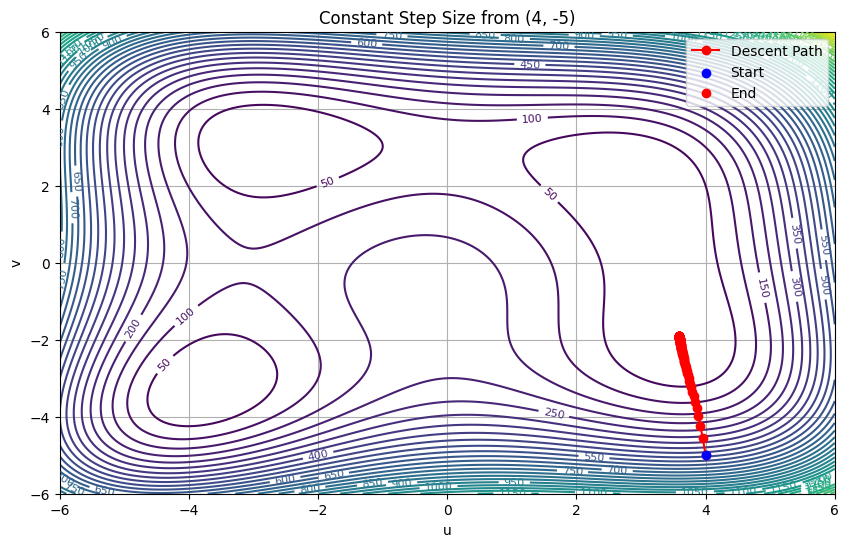

Descent calculation using decreasing (inverse square root) step size: 

Path taken by gradient descent using the sqrt method: [(4, -5), (3.956, -4.56), (3.929891957872301, -4.331199456285064), (3.9107514479102616, -4.174399101707531), (3.8954798106054755, -4.054827308656951), (3.8827149767687965, -3.95819395491312), (3.871724314954722, -3.877170141185532), (3.8620636985364, -3.8074765718392776), (3.85344151674797, -3.746389795078394), (3.845655002303184, -3.6920662342712554), (3.8385569313293963, -3.643198533403911), (3.832036728890251, -3.5988252674492482), (3.8260090537664078, -3.558218427547536), (3.8204065487499372, -3.5208133330062634), (3.8151750450166975, -3.4861630775174093), (3.810270280510898, -3.4539078571329944), (3.8056555890813653, -3.4237536926232743), (3.8013002327486025, -3.3954572864861454), (3.7971781722159266, -3.3688150043257936), (3.793267143411814, -3.343654700171255), (3.789547952381129, -3.319829546890291), (3.7860039289580354, -3.297213308362239), (3.782620497

In [ ]:
import math
# The lower two are only for plotting purposes
import matplotlib.pyplot as plt
import numpy as np

def f(u,v):
    # Defines the function to be used in the gradient_descent method later.
    return (u**2+v-11)**2 + (u+v**2-7)**2

def grad_f(u,v):
    # Method that takes a point (u,v) and returns its gradient based on the 
    # function provided in the description of the exercise. Since we don't need this to be 
    # adaptable to other functions, we can hardcode the derived function here.
    
    df_du = 4 * u * (u**2+v-11) + 2 * (u + v**2 - 7)
    df_dv = 4 * v * (v**2 + u - 7) + 2 * (u**2 + v - 11)
    
    return [df_du, df_dv]


def gradient_descent(f, grad_f, eta, u0, v0, max_iter=100) -> tuple[list, list]:
    # Performs the update rule (step 3 of the Gradient Descent algorithm given in lecture.)
    # Eta values defined by three "eta..." methods below.
    u, v = u0, v0 
    uPath = [u]
    vPath = [v]
    
    # Just for readability.
    if eta == eta_multistep:
        path_method = "multistep"
    elif eta == eta_sqrt:
        path_method = "sqrt"
    elif eta == eta_const:
        path_method = "constant"
    
    for t in range(max_iter):
        # Since the step-size changes depending on which eta function is used:
        stepSize = eta(t,c=1e-3)
        grad_u, grad_v = grad_f(u, v)
        u -= stepSize * grad_u
        v -= stepSize * grad_v 
        uPath.append(u)
        vPath.append(v)
    
    # Path taken needs to be represented properly, not just listing the two arrays.
    path = list(zip(uPath, vPath))
    
    # Same is true for the function values.
    values = [f(u_i, v_i) for u_i, v_i in path]

    print (f'Path taken by gradient descent using the {path_method} method: {path}')
    print(f'The final function value is {values[-1]}')
    print(f'The lowest value reached during training is {min(values)}\n')
    
    return path, values

def eta_const(t,c=1e-3) -> float:
    # Dealing with a constant - no need for calculations
    return c

def eta_sqrt(t,c=1e-3) -> float:
    return c / math.sqrt(t+1)

def eta_multistep(t, milestones=[30, 80, 100], c=1e-3, eta_init=1e-3) -> float:
    # Want to avoid doing X elif statements.
    milestonesPassed = sum(t>= m for m in milestones)
    
    if t < milestones[0]:
        return eta_init
    else: 
        return eta_init * (c**milestonesPassed)
    
    
# For the optional plotting comparison.
def plot_descent_trajectory(f, path, title="Gradient Descent Trajectory"):
    u_vals = np.linspace(-6, 6, 400)
    v_vals = np.linspace(-6, 6, 400)
    U, V = np.meshgrid(u_vals, v_vals)
    Z = f(U, V)
    u_path, v_path = zip(*path)

    plt.figure(figsize=(10, 6))
    cp = plt.contour(U, V, Z, levels=50, cmap='viridis')
    plt.clabel(cp, inline=True, fontsize=8)
    plt.plot(u_path, v_path, 'ro-', label='Descent Path')
    plt.scatter(u_path[0], v_path[0], color='blue', label='Start', zorder=5)
    plt.scatter(u_path[-1], v_path[-1], color='red', label='End', zorder=5)
    plt.title(title)
    plt.xlabel('u')
    plt.ylabel('v')
    plt.legend()
    plt.grid(True)
    plt.show()

startPoint = (4,-5)
print("Descent calculation using constant step size: \n")
descentConst = gradient_descent(f, grad_f, eta_const, startPoint[0], startPoint[1], 100)

print("Descent calculation using decreasing (inverse square root) step size: \n")
descentSqrt = gradient_descent(f, grad_f, eta_sqrt, startPoint[0], startPoint[1], 100)

print("Descent calculation using multi-step scheduling:\n")
descentMultistep = gradient_descent(f, grad_f, eta_multistep, startPoint[0], startPoint[1], 100)

    

# 3. Polynomial Regression

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing(as_frame=True)

# The data is in a pandas DataFrame
df = housing.frame

# View the first few rows
df.head()
print(housing.DESCR)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

# Let's separate features and target for clarity
features = df.drop(columns=["MedHouseVal"])
target = df["MedHouseVal"]

# Standardize the features
# Your Code Here
scaled_features = ...

# Split the dataset (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# 4. Bias and Variance
You can calculate the results manually, or use whatever code you would like.

# 5. Naive Bayes

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.space', 'misc.forsale', 'comp.graphics', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

# 6. Decision Trees

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df)
print(iris.DESCR)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

# 7. Support Vector Machines

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Load digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in